<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week4/week4_%EC%96%BC%EA%B5%B4%EC%97%90%EC%8A%A4%ED%8B%B0%EC%BB%A4(%EA%B7%80)%EB%B6%99%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴에 스티커(귀) 붙이기

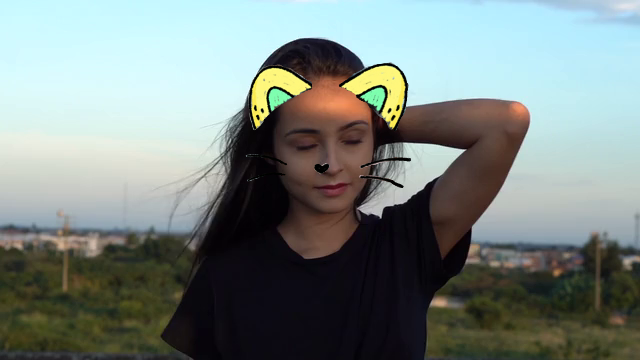

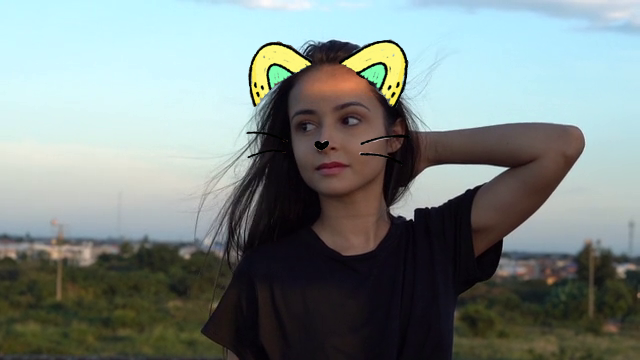

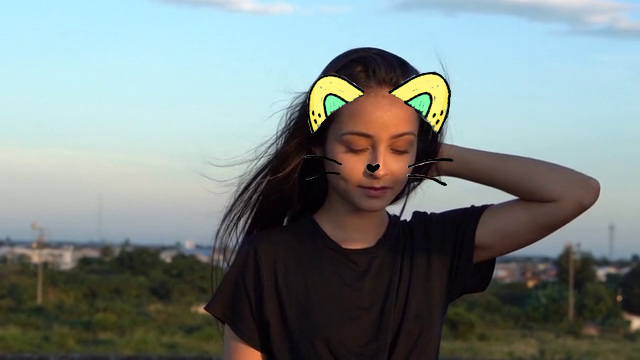

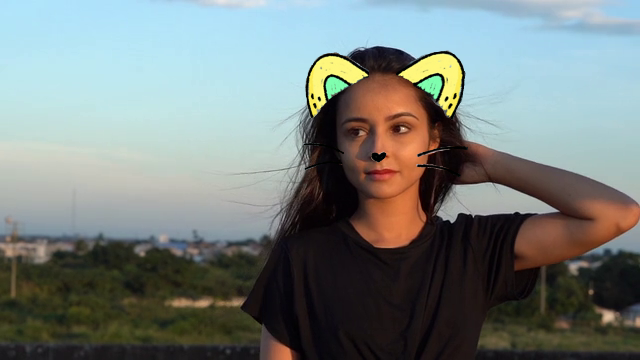

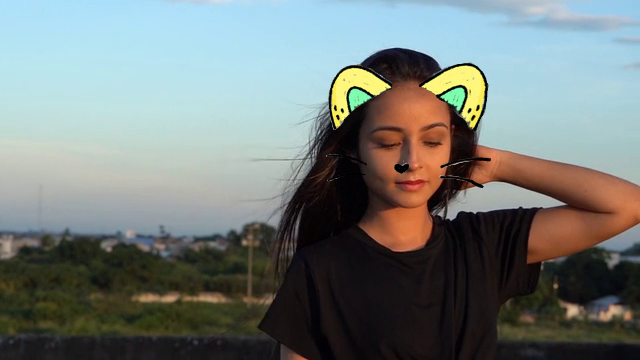

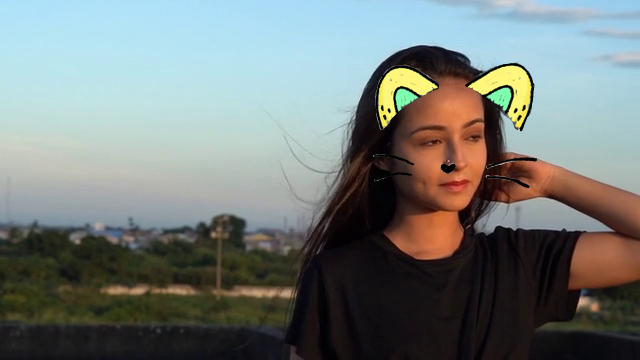

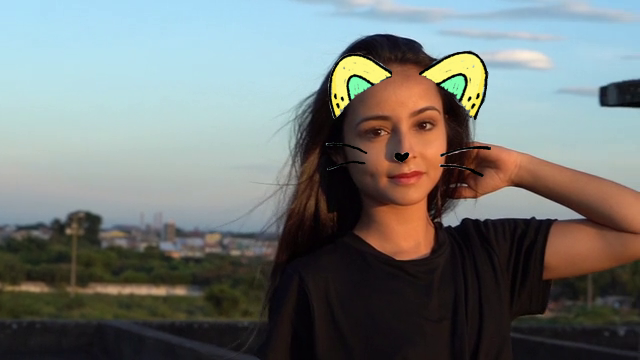

All frames are 605


In [1]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

detector= dlib.get_frontal_face_detector()

cap=cv2.VideoCapture('videos/01.mp4');
sticker_img = cv2.imread('imgs/sticker01.png',cv2.IMREAD_UNCHANGED);

f=0
while True:
    ret, img = cap.read()

    if ret == False:
        break

    # 얼굴영역 탐지하기
    dets = detector(img)
    # print("number of faces detected:", len(dets))

    for det in dets:
      x1 = det.left() - 40
      y1 = det.top() -  50
      x2 = det.right() + 40
      y2 = det.bottom() + 30

      

      #스티커붙이기
      # cv2.rectangle(img,pt1=(x1,y1), pt2=(x2,y2), color=(255,0,0), thickness=2 )
      try:
        overlay_img = sticker_img.copy()

        overlay_img = cv2.resize(overlay_img, dsize=(x2 - x1, y2 - y1))

        overlay_alpha = overlay_img[:, :, 3:4] / 255.0
        background_alpha = 1.0 - overlay_alpha

        img[y1:y2, x1:x2] = overlay_alpha * overlay_img[:, :, :3] + background_alpha * img[y1:y2, x1:x2]
      except:
        pass

    # 이미지 출력
    if f%100==0:
      cv2_imshow(img)
    f=f+1;
    # cv2.imshow('result', img)
    # if cv2.waitKey(1) == ord('q'):
    #     break
  
print("All frames are "+ str(f))